Mounting Drive and Pulling Files

In [ ]:
## Start by installing the necessary Google Cloud libraries in your Google Colab env
!pip install --upgrade --quiet gcsfs google-cloud-storage

In [ ]:
## Authenticate your Google account to access Google Cloud services. This will allow you to interact with Google Cloud Storage using the credentials associated with your account.
## Also import your Google Drive to access your team's Shared Google Drive as well as Operating System
from google.colab import auth
from google.colab import drive
import os
auth.authenticate_user()
drive.mount('/content/drive/', force_remount=True)

## If your team is using a Shared Drive in a Google Workspace (usually through a University Gmail account)
directory_path = '/content/drive/MyDrive/HDSI/'

## if your team is using a Shared Folder in a non-Google Workspace (for a free, individual account)
directory_path = '/content/drive/MyDrive/YOUR_SHARED_FOLDER_NAME/'


Mounted at /content/drive/


In [ ]:
## Initialize the Google Cloud Storage client.
from google.cloud import storage
client = storage.Client(project='HDSI-Agri-Datathon-2024')

In [ ]:
## All the data you need will be located in a specific prompt folder located in a Google bucket.
## I have included some code for you all to start exploring file types

bucket_name = 'hdsi-agri-prompt-data'

## Access the specified bucket
bucket = client.bucket(bucket_name)

## List all blobs (files and folders) in the bucket
blobs = list(bucket.list_blobs())

## Initialize variables to count and store folder names and file types
folders = set()
file_types = set()
blob_count = 0

## Loop through all blobs to gather folder names and file types
for blob in blobs:
    blob_name = blob.name

    ## Check if it's a folder (by convention, ends with '/')
    if blob_name.endswith('/'):
        folders.add(blob_name)
    else:
        ## Capture file type
        file_extension = blob_name.split('.')[-1] if '.' in blob_name else 'Unknown'
        file_types.add(file_extension)

    blob_count += 1

## list the folders
print("Folders in the bucket:")
for folder in folders:
    print(f" - {folder}")

## Show the file types of the first 5 files (skip folders)
print("\nFirst 5 file types:")
counter = 0
for blob in blobs:
    if not blob.name.endswith('/') and counter < 5:
        file_name = blob.name
        file_extension = file_name.split('.')[-1] if '.' in file_name else 'Unknown'
        print(f"File name: {file_name}, File type: {file_extension}")
        counter += 1

## Total count of blobs
print(f"\nTotal number of blobs in the bucket: {blob_count}")

## Print the unique file types found
print(f"\nFile types in the bucket: {', '.join(file_types)}")


Folders in the bucket:
 - HDSI_AGRI_Prompt_1/
 - HDSI_AGRI_Prompt_3/
 - HDSI_AGRI_Prompt_1/cropland_images/
 - HDSI_AGRI_Prompt_2/

First 5 file types:
File name: HDSI_AGRI_Prompt_1/NDVI_images/Adams_2001_01_NDVI.tif, File type: tif
File name: HDSI_AGRI_Prompt_1/NDVI_images/Adams_2001_02_NDVI.tif, File type: tif
File name: HDSI_AGRI_Prompt_1/NDVI_images/Adams_2001_03_NDVI.tif, File type: tif
File name: HDSI_AGRI_Prompt_1/NDVI_images/Adams_2001_04_NDVI.tif, File type: tif
File name: HDSI_AGRI_Prompt_1/NDVI_images/Adams_2001_05_NDVI.tif, File type: tif

Total number of blobs in the bucket: 14974

File types in the bucket: xlsx, tif, dbf, csv


Libraries Imported Here

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

Creating Data Frames from CSV and XLSX files

In [ ]:
df_sales = pd.read_csv("/content/drive/My Drive/HDSI/sales_data_county.csv")
df_sales.head()

<ipython-input-786-453212310974>:1: DtypeWarning:

Columns (5,6,7,8,9,10,13,14,15,16,30,31,46,47,52,53,54,55,56,57,58,59,60,61,64,65,66,67,70,71,72,73,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.



,STATE_FIPS_CODE,COUNTY_CODE,YEAR,ANIMAL_TOTALS_INCL_PRODUCTS_OPERATIONS_WITH_SALES,ANIMAL_TOTALS_INCL_PRODUCTS_SALES_MEASURED_IN_DOLLARS,AQUACULTURE_TOTALS_OPERATIONS_WITH_SALES_DISTRIBUTION,AQUACULTURE_TOTALS_SALES_DISTRIBUTION_MEASURED_IN_DOLLARS,BARLEY_OPERATIONS_WITH_SALES,BARLEY_SALES_MEASURED_IN_DOLLARS,BERRY_TOTALS_OPERATIONS_WITH_SALES,...,SORGHUM_OPERATIONS_WITH_SALES,SORGHUM_SALES_MEASURED_IN_DOLLARS,SOYBEANS_OPERATIONS_WITH_SALES,SOYBEANS_SALES_MEASURED_IN_DOLLARS,SPECIALTY_ANIMAL_TOTALS_EXCL_EQUINE_OPERATIONS_WITH_SALES,SPECIALTY_ANIMAL_TOTALS_EXCL_EQUINE_SALES_MEASURED_IN_DOLLARS,VEGETABLE_TOTALS_INCL_SEEDS_TRANSPLANTS_IN_THE_OPEN_OPERATIONS_WITH_SALES,VEGETABLE_TOTALS_INCL_SEEDS_TRANSPLANTS_IN_THE_OPEN_SALES_MEASURED_IN_DOLLARS,WHEAT_OPERATIONS_WITH_SALES,WHEAT_SALES_MEASURED_IN_DOLLARS
0,28,83,2022-01-01,21,"81,403,000",4,"81,233,000",NaN,NaN,NaN,...,1,(D),130,"111,720,000",2,(D),3,"25,000",10,(D)
1,36,93,2022-01-01,41,"2,055,000",NaN,NaN,1,(D),8,...,NaN,NaN,1,(D),9,(D),17,"1,530,000",NaN,NaN
2,13,79,2022-01-01,86,"85,593,000",1,(D),NaN,NaN,7,...,NaN,NaN,10,"25,000",1,(D),3,"51,000",NaN,NaN
3,29,127,2022-01-01,202,"31,588,000",NaN,NaN,NaN,NaN,4,...,NaN,NaN,176,"41,991,000",8,(D),6,"91,000",30,"2,324,000"
4,8,1,2022-01-01,345,"25,004,000",NaN,NaN,3,(D),8,...,25,"1,032,000",3,(D),63,"698,000",21,"1,080,000",87,"22,338,000"


In [ ]:
prompt2demos = pd.read_csv("/content/drive/My Drive/HDSI/prompt2_demos.csv")
prompt2demos.head()

<ipython-input-787-f62cf24bfc1b>:1: DtypeWarning:

Columns (23,48,49,66,89,97,142,150,155) have mixed types. Specify dtype option on import or set low_memory=False.



,STATE_FIPS_CODE,COUNTY_CODE,YEAR,AG_LAND_CROPLAND_HARVESTED_ACRES,AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_FULL_OWNER,AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_PART_OWNER,AG_LAND_CROPLAND_HARVESTED_ACRES_ON_OPERATIONS_WITH_TENURE_TENANT,AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS,AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS_WHERE_TENURE_FULL_OWNER,AG_LAND_CROPLAND_HARVESTED_NUMBER_OF_OPERATIONS_WHERE_TENURE_PART_OWNER,...,PRODUCERS_WHITE_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_ANY_OPERATION_6_TO_10_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_ANY_OPERATION_AVG_MEASURED_IN_YEARS,PRODUCERS_YEARS_ON_ANY_OPERATION_GE_11_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_ANY_OPERATION_LT_6_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_3_TO_4_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_5_TO_9_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_AVG_MEASURED_IN_YEARS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_GE_10_YEARS_NUMBER_OF_PRODUCERS,PRODUCERS_YEARS_ON_PRESENT_OPERATION_LT_3_YEARS_NUMBER_OF_PRODUCERS
0,1,1,1997-01-01,27857,5834,13764,8259,246,132,94,...,3101,464,NaN,2328,460,263,546,NaN,2264,183
1,1,1,2002-01-01,26132,8897,13344,3891,201,113,76,...,3101,464,NaN,2328,460,263,546,NaN,2264,183
2,1,1,2007-01-01,18548,4298,8820,5430,196,100,77,...,3101,464,NaN,2328,460,263,546,NaN,2264,183
3,1,1,2012-01-01,29676,5607,16671,7398,204,102,70,...,3101,464,NaN,2328,460,263,546,NaN,2264,183
4,1,1,2017-01-01,27557,4321,17027,6209,167,74,82,...,493,84,22,386,98,66,104,20,368,30


In [ ]:
inflationGDP = pd.read_excel("/content/drive/My Drive/HDSI/inflation_GDP.xlsx")
inflationGDP.head()

,Table 1.1.4. Price Indexes for Gross Domestic Product,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,"[Index numbers, 2017=100]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bureau of Economic Analysis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Last Revised on: August 29, 2024 - Next Releas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Line,NaN,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022


Data Cleaning (D) and (Z) values To pull AGE and ACRE data

In [ ]:
df = prompt2demos.copy()

# Set Pandas display option to show large numbers without scientific notation
pd.set_option('display.float_format', '{:.0f}'.format)

# Convert 'AG_LAND_CROPLAND_HARVESTED_ACRES' column to numeric, replacing non-numeric with NaN
df['AG_LAND_CROPLAND_HARVESTED_ACRES'] = pd.to_numeric(df['AG_LAND_CROPLAND_HARVESTED_ACRES'], errors='coerce')

# Loop through each unique STATE_FIPS_CODE and YEAR combination
for state_fips in df['STATE_FIPS_CODE'].unique():
    for year in df[df['STATE_FIPS_CODE'] == state_fips]['YEAR'].unique():

        # Filter the rows for the current state and year
        state_year_data = df[(df['STATE_FIPS_CODE'] == state_fips) & (df['YEAR'] == year)]

        # Get the state total (where COUNTY_CODE == 999)
        state_total = state_year_data[state_year_data['COUNTY_CODE'] == 999]['AG_LAND_CROPLAND_HARVESTED_ACRES'].iloc[0]

        # Sum the known county-level values (COUNTY_CODE != 999)
        known_county_sum = state_year_data[state_year_data['COUNTY_CODE'] != 999]['AG_LAND_CROPLAND_HARVESTED_ACRES'].sum()

        # Count the number of missing values (NaN) in the counties (COUNTY_CODE != 999)
        num_missing = state_year_data[(state_year_data['COUNTY_CODE'] != 999) & state_year_data['AG_LAND_CROPLAND_HARVESTED_ACRES'].isnull()].shape[0]

        # If there are missing values, calculate the imputed value
        if num_missing > 0:
            imputed_value = (state_total - known_county_sum) / num_missing

            # Assign the imputed value to the missing counties
            df.loc[(df['STATE_FIPS_CODE'] == state_fips) &
                   (df['YEAR'] == year) &
                   (df['COUNTY_CODE'] != 999) &
                   (df['AG_LAND_CROPLAND_HARVESTED_ACRES'].isnull()), 'AG_LAND_CROPLAND_HARVESTED_ACRES'] = imputed_value

# Select the relevant columns
prompt2_acres_harvested = df[['STATE_FIPS_CODE', 'COUNTY_CODE', 'YEAR', 'AG_LAND_CROPLAND_HARVESTED_ACRES']]

# Print the first 500 rows without scientific notation
prompt2_acres_harvested.head()


,STATE_FIPS_CODE,COUNTY_CODE,YEAR,AG_LAND_CROPLAND_HARVESTED_ACRES
0,1,1,1997-01-01,27857
1,1,1,2002-01-01,26132
2,1,1,2007-01-01,18548
3,1,1,2012-01-01,29676
4,1,1,2017-01-01,27557


In [ ]:
# Assuming your DataFrame is called "prompt2demos"
df = prompt2demos.copy()

# Combine the two age columns into a new column 'AVERAGE_AGE'
df['AVERAGE_AGE'] = df['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'].fillna(df['PRODUCERS_AGE_AVG_MEASURED_IN_YEARS'])

df['YEAR'] = df['YEAR'].str[:4]

# Select the desired columns for the new DataFrame
prompt2_average_age = df[['STATE_FIPS_CODE', 'COUNTY_CODE', 'YEAR', 'AVERAGE_AGE']]

# Print or save the new DataFrame (optional)
prompt2_average_age.head()

,STATE_FIPS_CODE,COUNTY_CODE,YEAR,AVERAGE_AGE
0,1,1,1997,57.4
1,1,1,2002,58.1
2,1,1,2007,56.2
3,1,1,2012,58.2
4,1,1,2017,57


State Age Data

In [ ]:
# Read the Excel file
df_statelevel = pd.read_excel("/content/drive/My Drive/HDSI/state_level.xlsx")

# Filter for rows containing EITHER operator OR producer average age data
avg_age_df = df_statelevel[df_statelevel["Data Item"].str.contains("AGE, AVG, MEASURED IN YEARS")]

# Select columns containing average age data
avg_age_columns = avg_age_df.columns[4:]

# Calculate the row-wise sum of average ages across selected columns
avg_age_df["Total Average Age"] = avg_age_df[avg_age_columns].sum(axis=1)

# Calculate the number of entries (average age columns) for each row
avg_age_df["Entry Count"] = avg_age_df[avg_age_columns].count(axis=1)

# Calculate the average of the average ages
avg_age_df["Average Age"] = avg_age_df["Total Average Age"] / avg_age_df["Entry Count"]

# Group by Year, State ANSI and select the calculated "Average Age"
avg_age_summary_df = avg_age_df.groupby(["Year","State ANSI"])["Average Age"].mean().reset_index()

# Print the resulting DataFrame
avg_age_summary_df.head()

<ipython-input-791-a900d39996d9>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-791-a900d39996d9>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-791-a900d39996d9>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,State ANSI,Average Age
0,2002,1,55
1,2002,2,55
2,2002,4,55
3,2002,5,54
4,2002,6,57


Correlation between Average Age and Cropland Harvested Acres

Correlation between AVERAGE_AGE and AG_LAND_CROPLAND_HARVESTED_ACRES after removing outliers: -0.2476004708565156


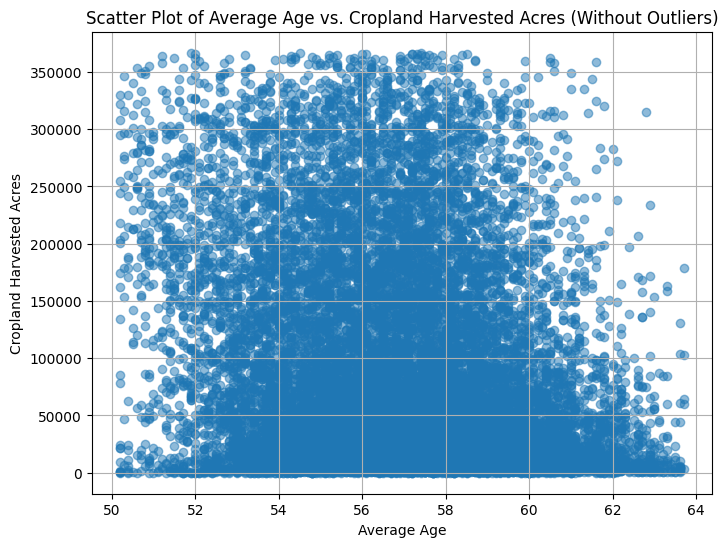

In [ ]:
# Create copies of the DataFrames
merged_df = prompt2_average_age.copy()
acres_harvested_copy = prompt2_acres_harvested.copy()

# Merge the copies using the correct column
acres_harvested = acres_harvested_copy.iloc[:,-1]
merged_df['AG_LAND_CROPLAND_HARVESTED_ACRES'] = acres_harvested

# Convert AVERAGE_AGE to numeric, handling potential errors
merged_df['AVERAGE_AGE'] = pd.to_numeric(merged_df['AVERAGE_AGE'], errors='coerce')


# Calculate the IQR for AVERAGE_AGE
Q1_age = merged_df['AVERAGE_AGE'].quantile(0.25)
Q3_age = merged_df['AVERAGE_AGE'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Calculate the IQR for AG_LAND_CROPLAND_HARVESTED_ACRES
Q1_acres = merged_df['AG_LAND_CROPLAND_HARVESTED_ACRES'].quantile(0.25)
Q3_acres = merged_df['AG_LAND_CROPLAND_HARVESTED_ACRES'].quantile(0.75)
IQR_acres = Q3_acres - Q1_acres

# Define the bounds for filtering out outliers
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

lower_bound_acres = Q1_acres - 1.5 * IQR_acres
upper_bound_acres = Q3_acres + 1.5 * IQR_acres

# Filter the DataFrame to remove outliers
filtered_df = merged_df[
    (merged_df['AVERAGE_AGE'] >= lower_bound_age) &
    (merged_df['AVERAGE_AGE'] <= upper_bound_age) &
    (merged_df['AG_LAND_CROPLAND_HARVESTED_ACRES'] >= lower_bound_acres) &
    (merged_df['AG_LAND_CROPLAND_HARVESTED_ACRES'] <= upper_bound_acres)
]

# Calculate the correlation between AVERAGE_AGE and AG_LAND_CROPLAND_HARVESTED_ACRES after removing outliers
correlation_filtered = filtered_df['AVERAGE_AGE'].corr(filtered_df['AG_LAND_CROPLAND_HARVESTED_ACRES'])

# Print the correlation coefficient
print(f"Correlation between AVERAGE_AGE and AG_LAND_CROPLAND_HARVESTED_ACRES after removing outliers: {correlation_filtered}")

# Create the scatter plot with the filtered data
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['AVERAGE_AGE'], filtered_df['AG_LAND_CROPLAND_HARVESTED_ACRES'], alpha=0.5)

# Add labels and title
plt.title('Scatter Plot of Average Age vs. Cropland Harvested Acres (Without Outliers)')
plt.xlabel('Average Age')
plt.ylabel('Cropland Harvested Acres')

# Display the plot
plt.grid(True)
plt.show()



Choropleth For AGE and ACRES by County

In [ ]:
def create_choropleth_by_year(df):
    """
    Creates choropleth maps of average age by county for each year,
    all using the same color scale for comparison.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
        None: Displays the choropleth maps for each year.
    """

    # Get unique years in the data:
    years = df['YEAR'].unique()

    # Determine the global range for the color scale:
    min_age = df['AVERAGE_AGE'].min()
    max_age = df['AVERAGE_AGE'].max()

    for year in years:
        # Filter the DataFrame for the current year:
        df_year = df[df['YEAR'] == year]

        # Create FIPS column if it doesn't exist:
        if 'FIPS' not in df_year.columns:
            df_year['FIPS'] = df_year['STATE_FIPS_CODE'].astype(str).str.zfill(2) + df_year['COUNTY_CODE'].astype(str).str.zfill(3)

        # Create the choropleth map:
        fig = px.choropleth(
            df_year,
            geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
            locations='FIPS',
            color='AVERAGE_AGE',
            color_continuous_scale="Viridis",
            range_color=(min_age, max_age),  # Set the color range
            scope="usa",
            title=f"Average Age by County - {year}",
            labels={'AVERAGE_AGE': 'Average Age'}
        )

        # Update layout:
        fig.update_layout(margin={"r": 0, "t": 40, "l": 0, "b": 0})

        # Show the map:
        fig.show()

# Call the function with your DataFrame:
create_choropleth_by_year(merged_df)

<ipython-input-793-fbe028ad08d7>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-793-fbe028ad08d7>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-793-fbe028ad08d7>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-793-fbe028ad08d7>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-793-fbe028ad08d7>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-793-fbe028ad08d7>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def create_choropleth_by_year_harvested_acres(df):
    """
    Creates choropleth maps of harvested acres by county for each year,
    all using the same color scale for comparison, after removing outliers.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
        None: Displays the choropleth maps for each year.
    """

    # Get unique years in the data:
    years = df['YEAR'].unique()

    # Calculate the Interquartile Range (IQR) for outlier detection:
    Q1 = df['AG_LAND_CROPLAND_HARVESTED_ACRES'].quantile(0.25)
    Q3 = df['AG_LAND_CROPLAND_HARVESTED_ACRES'].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds for outliers:
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers from the DataFrame:
    df_no_outliers = df[(df['AG_LAND_CROPLAND_HARVESTED_ACRES'] >= lower_bound) &
                        (df['AG_LAND_CROPLAND_HARVESTED_ACRES'] <= upper_bound)]

    # Determine the global range for the color scale (after removing outliers):
    min_acres = df_no_outliers['AG_LAND_CROPLAND_HARVESTED_ACRES'].min()
    max_acres = df_no_outliers['AG_LAND_CROPLAND_HARVESTED_ACRES'].max()

    for year in years:
        # Filter the DataFrame for the current year:
        df_year = df_no_outliers[df_no_outliers['YEAR'] == year]

        # Create FIPS column if it doesn't exist:
        if 'FIPS' not in df_year.columns:
            df_year['FIPS'] = df_year['STATE_FIPS_CODE'].astype(str).str.zfill(2) + df_year['COUNTY_CODE'].astype(str).str.zfill(3)

        # Create the choropleth map:
        fig = px.choropleth(
            df_year,
            geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
            locations='FIPS',
            color='AG_LAND_CROPLAND_HARVESTED_ACRES',
            color_continuous_scale="Viridis",
            range_color=(min_acres, max_acres),
            scope="usa",
            title=f"Harvested Acres by County - {year} (Outliers Removed)",
            labels={'AG_LAND_CROPLAND_HARVESTED_ACRES': 'Harvested Acres'}
        )

        # Update layout:
        fig.update_layout(margin={"r": 0, "t": 40, "l": 0, "b": 0})

        # Show the map:
        fig.show()

# Call the function with your DataFrame:
create_choropleth_by_year_harvested_acres(merged_df)

<ipython-input-794-546bd3328209>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-794-546bd3328209>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-794-546bd3328209>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-794-546bd3328209>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-794-546bd3328209>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-794-546bd3328209>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



State Based Age vs Farm Gross Evaluation

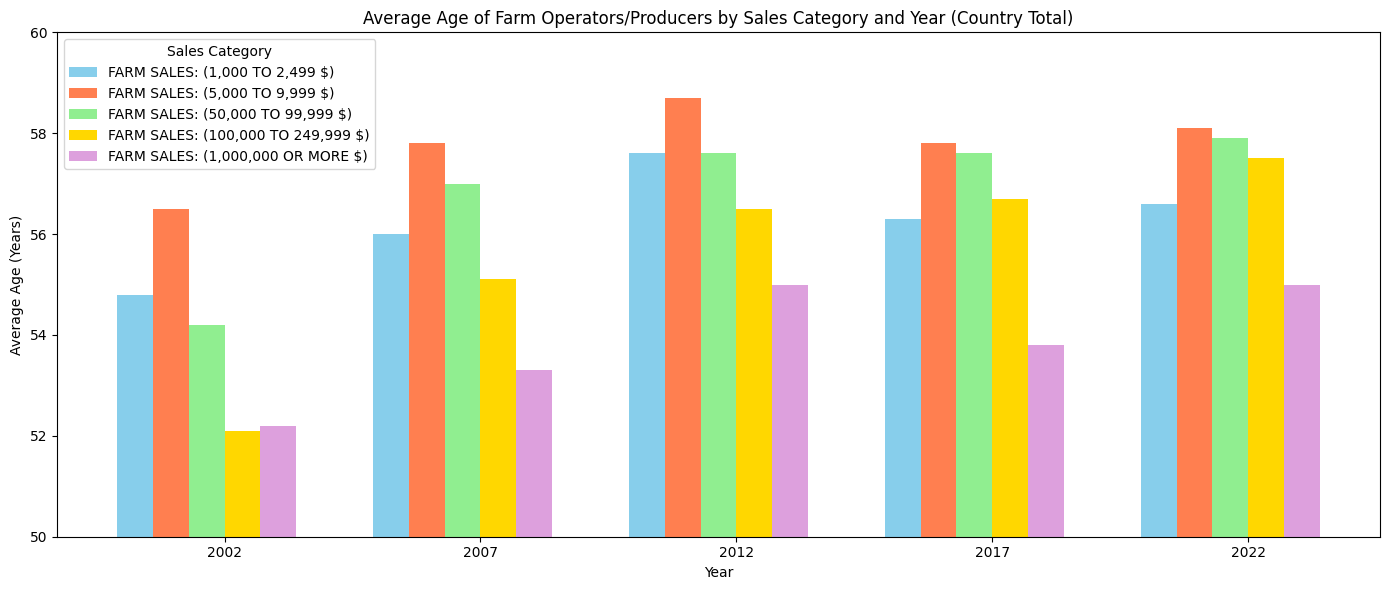

In [ ]:
df = df_statelevel.copy()

# Filter for country total data (State ANSI 99)
df_country = df[df["State ANSI"] == 99]

# Select relevant columns and rows
sales_cols = ["FARM SALES: (1,000 TO 2,499 $)",
              "FARM SALES: (5,000 TO 9,999 $)",
              "FARM SALES: (50,000 TO 99,999 $)",
              "FARM SALES: (100,000 TO 249,999 $)",
              "FARM SALES: (1,000,000 OR MORE $)"]
age_rows = ["OPERATORS, PRINCIPAL - AGE, AVG, MEASURED IN YEARS",
           "PRODUCERS - AGE, AVG, MEASURED IN YEARS"]

df_age_sales = df_country[df_country["Data Item"].isin(age_rows)][["Year", "Data Item"] + sales_cols]

# Reshape data for plotting
df_plot = df_age_sales.melt(id_vars=["Year", "Data Item"], value_vars=sales_cols,
                           var_name="Sales Category", value_name="Average Age")

# Define colors for the bars (one for each sales category)
colors = ['skyblue', 'coral', 'lightgreen', 'gold', 'plum']

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))  # Wider figure for more categories

# Loop through years and create a grouped bar plot for each year
num_cats = len(sales_cols)
width = 0.7 / num_cats  # Adjust width to make bars smaller

for i, year in enumerate(df_plot["Year"].unique()):
    df_year = df_plot[df_plot["Year"] == year]
    for j, sales_cat in enumerate(sales_cols):
        df_cat = df_year[df_year["Sales Category"] == sales_cat]
        x_pos = i + j * width  # Calculate x position considering year and category
        ax.bar(x_pos, df_cat["Average Age"], width, label=sales_cat, color=colors[j])

# Set plot labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Average Age (Years)")
ax.set_title("Average Age of Farm Operators/Producers by Sales Category and Year (Country Total)")

# Set x-axis ticks and labels
ax.set_xticks([i + width * (num_cats / 2) for i in range(len(df_plot["Year"].unique()))])
ax.set_xticklabels(df_plot["Year"].unique())

# Set y-axis limits
ax.set_ylim(50, 60)

# Customize legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Sales Category", loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()

AGE Graphs by Nation and State

In [ ]:
# Average age
years_of_interest = [2002, 2007, 2012, 2017, 2022]
filtered_df = avg_age_summary_df[avg_age_summary_df["Year"].isin(years_of_interest)]

# Average age per year
avg_age_per_year = filtered_df.groupby("Year")["Average Age"].mean().reset_index()

#  Line graph
fig = px.line(avg_age_per_year, x="Year", y="Average Age",
              title="Average Age Over Time (2002-2022)",
              labels={"Average Age": "Average Age (Years)", "Year": "Year"})
fig.show()

In [ ]:
# Dictionary to map State FIPS (State ANSI) codes to state abbreviations
fips_to_state = {
    1: "AL", 2: "AK", 4: "AZ", 5: "AR", 6: "CA", 8: "CO", 9: "CT", 10: "DE", 11: "DC",
    12: "FL", 13: "GA", 15: "HI", 16: "ID", 17: "IL", 18: "IN", 19: "IA", 20: "KS",
    21: "KY", 22: "LA", 23: "ME", 24: "MD", 25: "MA", 26: "MI", 27: "MN", 28: "MS",
    29: "MO", 30: "MT", 31: "NE", 32: "NV", 33: "NH", 34: "NJ", 35: "NM", 36: "NY",
    37: "NC", 38: "ND", 39: "OH", 40: "OK", 41: "OR", 42: "PA", 44: "RI", 45: "SC",
    46: "SD", 47: "TN", 48: "TX", 49: "UT", 50: "VT", 51: "VA", 53: "WA", 54: "WV",
    55: "WI", 56: "WY"
}

# Filter the avg_age_summary_df for the specified years
years_of_interest = [2002, 2007, 2012, 2017, 2022]
filtered_df = avg_age_summary_df[avg_age_summary_df["Year"].isin(years_of_interest)]

# Assign state abbreviations based on the FIPS code
filtered_df["State Abbreviation"] = filtered_df["State ANSI"].map(fips_to_state)

# Calculate the mean average age for each state and year
avg_age_per_state_year = filtered_df.groupby(["Year", "State Abbreviation"])["Average Age"].mean().reset_index()

# Create a line plot using Plotly
fig = px.line(avg_age_per_state_year, x="Year", y="Average Age", color="State Abbreviation",
              title="Average Age Over Time (2002-2022) by State",
              labels={"Average Age": "Average Age (Years)", "Year": "Year", "State Abbreviation": "State"})

# Show the plot
fig.show()


In [ ]:
# Filter the avg_age_summary_df for the year 2007
df_2002 = avg_age_summary_df[avg_age_summary_df["Year"] == 2002]

# Dictionary to map State FIPS (State ANSI) codes to state abbreviations
fips_to_state = {
    1: "AL", 2: "AK", 4: "AZ", 5: "AR", 6: "CA", 8: "CO", 9: "CT", 10: "DE", 11: "DC",
    12: "FL", 13: "GA", 15: "HI", 16: "ID", 17: "IL", 18: "IN", 19: "IA", 20: "KS",
    21: "KY", 22: "LA", 23: "ME", 24: "MD", 25: "MA", 26: "MI", 27: "MN", 28: "MS",
    29: "MO", 30: "MT", 31: "NE", 32: "NV", 33: "NH", 34: "NJ", 35: "NM", 36: "NY",
    37: "NC", 38: "ND", 39: "OH", 40: "OK", 41: "OR", 42: "PA", 44: "RI", 45: "SC",
    46: "SD", 47: "TN", 48: "TX", 49: "UT", 50: "VT", 51: "VA", 53: "WA", 54: "WV",
    55: "WI", 56: "WY"
}

# Assign state abbreviations based on the FIPS code
df_2002["State Abbreviation"] = df_2002["State ANSI"].map(fips_to_state)

# Add text for hover info (state and average age)
df_2002['text'] = df_2002['State Abbreviation'] + '<br>' + \
                  'Average Age: ' + df_2002['Average Age'].round(2).astype(str)

# Create choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=df_2002['State Abbreviation'],  # State abbreviations
    z=df_2002['Average Age'].astype(float),   # Data to color by (Average Age)
    locationmode='USA-states',                # Map mode for USA states
    colorscale='Blues',                       # Color scale for map
    autocolorscale=False,
    text=df_2002['text'],                     # Hover text
    marker_line_color='white',                # State borders color
    colorbar_title="Average Age (Years)"      # Color bar title
))

# Update layout for the plot
fig.update_layout(
    title_text='2002 US Average Age by State<br>(Hover for details)',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),  # Projection type
        showlakes=True,                                         # Show lakes
        lakecolor='rgb(255, 255, 255)'                          # Lake color
    ),
)

# Show the plot
fig.show()

<ipython-input-798-3710ac2d6703>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-798-3710ac2d6703>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Filter the avg_age_summary_df for the year 2007
df_2022 = avg_age_summary_df[avg_age_summary_df["Year"] == 2022]

# Dictionary to map State FIPS (State ANSI) codes to state abbreviations
fips_to_state = {
    1: "AL", 2: "AK", 4: "AZ", 5: "AR", 6: "CA", 8: "CO", 9: "CT", 10: "DE", 11: "DC",
    12: "FL", 13: "GA", 15: "HI", 16: "ID", 17: "IL", 18: "IN", 19: "IA", 20: "KS",
    21: "KY", 22: "LA", 23: "ME", 24: "MD", 25: "MA", 26: "MI", 27: "MN", 28: "MS",
    29: "MO", 30: "MT", 31: "NE", 32: "NV", 33: "NH", 34: "NJ", 35: "NM", 36: "NY",
    37: "NC", 38: "ND", 39: "OH", 40: "OK", 41: "OR", 42: "PA", 44: "RI", 45: "SC",
    46: "SD", 47: "TN", 48: "TX", 49: "UT", 50: "VT", 51: "VA", 53: "WA", 54: "WV",
    55: "WI", 56: "WY"
}

# Assign state abbreviations based on the FIPS code
df_2022["State Abbreviation"] = df_2022["State ANSI"].map(fips_to_state)

# Add text for hover info (state and average age)
df_2022['text'] = df_2022['State Abbreviation'] + '<br>' + \
                  'Average Age: ' + df_2022['Average Age'].round(2).astype(str)

# Create choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=df_2022['State Abbreviation'],  # State abbreviations
    z=df_2022['Average Age'].astype(float),   # Data to color by (Average Age)
    locationmode='USA-states',                # Map mode for USA states
    colorscale='Blues',                       # Color scale for map
    autocolorscale=False,
    text=df_2022['text'],                     # Hover text
    marker_line_color='white',                # State borders color
    colorbar_title="Average Age (Years)"      # Color bar title
))

# Update layout for the plot
fig.update_layout(
    title_text='2022 US Average Age by State<br>(Hover for details)',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),  # Projection type
        showlakes=True,                                         # Show lakes
        lakecolor='rgb(255, 255, 255)'                          # Lake color
    ),
)

# Show the plot
fig.show()

<ipython-input-799-7db15f1e8f3d>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-799-7db15f1e8f3d>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

